In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import linregress

%matplotlib inline

##  Import data

In [2]:
def parse_sea_data():
    sea = pd.read_csv('epa-sea-level.csv')
    sea.rename({'Year': 'year', 
            'CSIRO Adjusted Sea Level': 'CSIRO', 
            'Lower Error Bound': 'lower', 
            'Upper Error Bound': 'upper', 
            'NOAA Adjusted Sea Level': 'NOAA'}, 
          axis='columns', 
          inplace=True)
    return sea

In [3]:
sea = parse_sea_data()
sea

,year,CSIRO,lower,upper,NOAA
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


## Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.


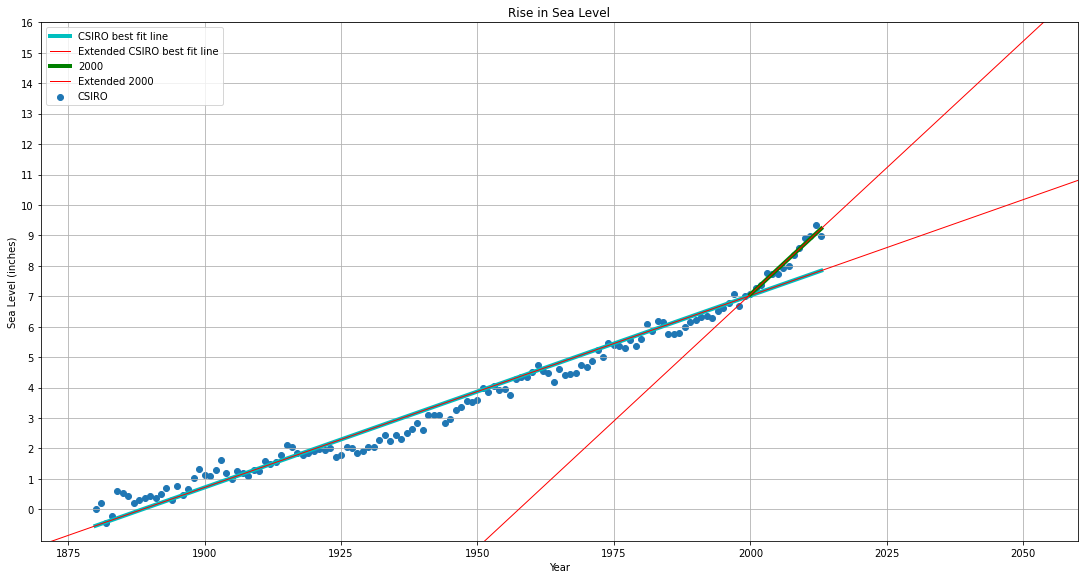

In [4]:
def draw_plot():
    # Read data from file
    sea = parse_sea_data()

    # Create scatter plot
    
    fig = plt.figure(figsize=(16, 8))
    axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])

    # Add axes attributes
    axes.set_title('Rise in Sea Level')
    axes.set_xlabel('Year')
    axes.set_ylabel('Sea Level (inches)')
    axes.set_xticks([1850.0, 1875.0, 1900.0, 1925.0, 1950.0, 1975.0, 2000.0, 2025.0, 2050.0])
    axes.set_yticks(list(range(0, 20)))

    axes.set_xlim((1870.0, 2060.0))
    axes.set_ylim((-1.0355688083726844, 16.0))

    # axes tuning
    plt.grid()

    # plot CSIRO data
    plt.scatter('year', 'CSIRO', data=sea)


    # Linear Regression
    # finds the line of best fit line through your data 
    # by searching for the regression coefficient (B1) that minimizes the total error (e) of the model.

    def extended(ax, x, y, **args):

        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        x_ext = np.linspace(xlim[0], xlim[1], 100)
        p = np.polyfit(x, y , deg=1)

        y_ext = np.poly1d(p)(x_ext)
        ax.plot(x_ext, y_ext, **args)

        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

        return ax    

    lin = linregress(sea.year, sea.CSIRO)
    # plt.plot(sea.year, (lin.intercept + lin.slope * sea.year), 'c', lw=4)


    x = sea.year
    y = (lin.intercept + lin.slope * sea.year)

    
    axes.plot(x, y, 'c', lw=4, label='CSIRO best fit line')
    axes = extended(axes, x, y,  color="r", lw=1, label="Extended CSIRO best fit line")

    





    data_x_2000 = sea.loc[sea.year >= 2000, 'year']
    data_y_2000 = sea.loc[sea.year >= 2000, 'CSIRO']
    lin2000 = linregress(data_x_2000, data_y_2000)
    x_2 = data_x_2000.copy()
    y_2 = lin2000.intercept + lin2000.slope * x_2

    axes.plot(x_2, y_2, 'g', label='2000', lw=4)
    axes = extended(axes, x_2, y_2,  color="r", lw=1, label="Extended 2000")
    



    axes.legend()
    
    # Create first line of best fit
    
    # Create second line of best fit
    
    # Save plot and return data for testing
    fig.savefig('sea_level_plot.png')
    
    # return plt.gca()
    return fig


fig = draw_plot()


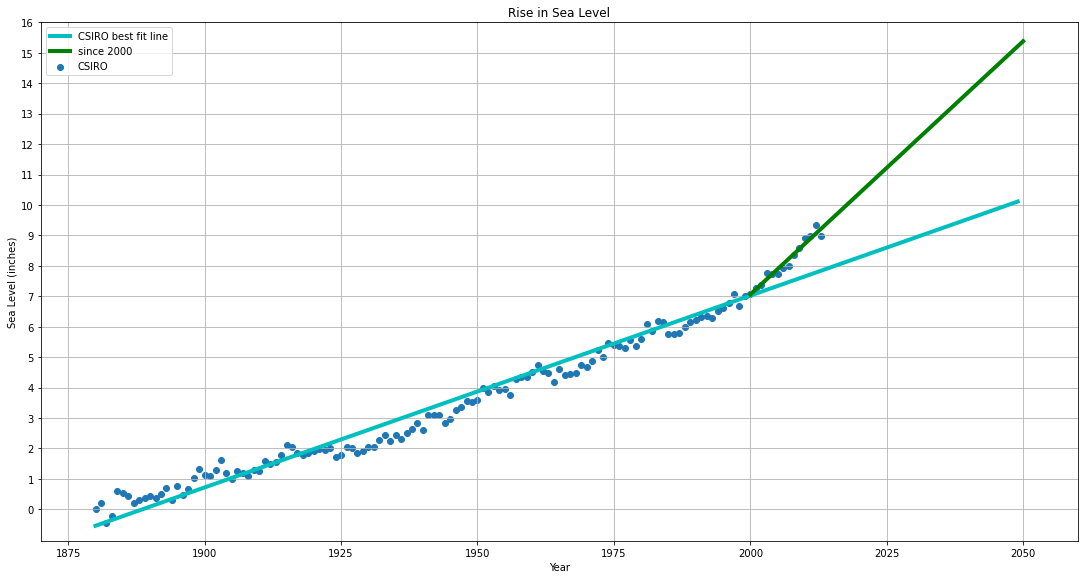

In [5]:
def draw_plot_v_final():
    
    # Read data from file
    sea = parse_sea_data()

    # Create scatter plot
    
    fig = plt.figure(figsize=(16, 8))
    axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
    
    # plot CSIRO data
    plt.scatter('year', 'CSIRO', data=sea)


    # Linear Regression
    # finds the line of best fit line through your data 
    # by searching for the regression coefficient (B1) that minimizes the total error (e) of the model. 
    
    # main line
    lin = linregress(sea.year, sea.CSIRO)
    x = sea.year
    z = pd.Series(range(2014, 2050, 1), dtype='float')
    x = pd.concat((x, z), axis=0)
    x.sort_values(inplace=True)
    y = (lin.intercept + (lin.slope * x))
    axes.plot(x, y, 'c', lw=4, label='CSIRO best fit line')
    
    # 2000 line
    data_x_since_2000 = sea.loc[sea.year >= 2000, 'year']
    data_y_since_2000 = sea.loc[sea.year >= 2000, 'CSIRO']
    lin_2000 = linregress(data_x_since_2000, data_y_since_2000)
    
    x_2000 = pd.Series(range(2000, 2051, 1), dtype='float')
    y_2000 = (lin_2000.intercept + (lin_2000.slope * x_2000))
    axes.plot(x_2000, y_2000, 'g', label='since 2000', lw=4)


    # Add axes attributes
    axes.set_title('Rise in Sea Level')
    axes.set_xlabel('Year')
    axes.set_ylabel('Sea Level (inches)')
    axes.set_xticks([1850.0, 1875.0, 1900.0, 1925.0, 1950.0, 1975.0, 2000.0, 2025.0, 2050.0, 2075.0])
    axes.set_yticks(list(range(0, 20)))

    axes.set_xlim((1870.0, 2060.0))
    axes.set_ylim((-1.0355688083726844, 16.0))
    axes.legend()
    
    # axes tuning
    plt.grid()
    
    # Save plot and return data for testing
    plt.savefig('sea_level_plot.png')
    return plt.gca()
    # return fig


fig_final = draw_plot_v_final()
